# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [53]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/georgem/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# # Read your api key environment variable
from newsapi import NewsApiClient
api_key = os.getenv("NEWS_API_KEY")

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [55]:
# Fetch all the news about Bitcoin
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by= "relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
#bitcoin_headlines["articles"][0]

# # Fetch the Bitcoin news articles
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        url = article["url"]
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "date": date,
            "url" : url,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# # Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "url", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

Total articles about Bitcoin: 10236


In [56]:
# Create the Ethereum sentiment scores DataFrame
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
#ethereum_headlines["articles"][0]

# Fetch the Ethereum news articles
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        url = article["url"] 
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text": text,
            "date": date,
            "url": url,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
cols = ["date", "text", "url", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

Total articles about Ethereum: 3980


In [57]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df.head()

,date,text,url,compound,positive,negative,neutral
0,2021-05-07,Shares of Square are up more than 6% today aft...,http://techcrunch.com/2021/05/07/what-squares-...,0.2960,0.058,0.0,0.942
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,http://techcrunch.com/2021/04/26/tesla-sees-bi...,0.0000,0.000,0.0,1.000
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,0.7506,0.171,0.0,0.829
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,http://techcrunch.com/2021/04/23/crypto-market...,0.0000,0.000,0.0,1.000
4,2021-04-13,The crypto industry as a whole has seen a mome...,http://techcrunch.com/2021/04/13/african-crypt...,0.6124,0.135,0.0,0.865


In [58]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.111732,0.056420,0.027260,0.916330
std,0.331116,0.066425,0.044453,0.084028
min,-0.680800,0.000000,0.000000,0.662000
25%,0.000000,0.000000,0.000000,0.855500
50%,0.000000,0.048000,0.000000,0.931000
75%,0.323650,0.097000,0.058500,1.000000
max,0.817600,0.269000,0.219000,1.000000


In [59]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df.head()

,date,text,url,compound,positive,negative,neutral
0,2021-05-04,Their investors call them disruptive innovator...,http://techcrunch.com/2021/05/04/radical-ether...,-0.4019,0.072,0.15,0.778
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,0.7506,0.171,0.00,0.829
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,https://mashable.com/article/venmo-crypto/,0.0258,0.034,0.00,0.966
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,https://www.cnn.com/2021/05/01/investing/ether...,0.0000,0.000,0.00,1.000
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",http://techcrunch.com/2021/05/03/cryptopunks-m...,0.4754,0.091,0.00,0.909


In [60]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.00000,100.000000
mean,0.099194,0.048790,0.02342,0.927800
std,0.341264,0.064797,0.04546,0.077835
min,-0.918600,0.000000,0.00000,0.694000
25%,0.000000,0.000000,0.00000,0.884750
50%,0.000000,0.000000,0.00000,0.942500
75%,0.323650,0.077500,0.04050,1.000000
max,0.827100,0.256000,0.28900,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [61]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [62]:
# Expand the default stop words list if necessary
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/georgem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
# Complete the tokenizer function
def tokenizer(text):
    
    # Instantiate the lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    
    # Create a tokenized list of the words
    re_clean = regex.sub('', text)
    
    # Lemmatize words into root words
    words = word_tokenize(re_clean)
    
    # Convert the words to lowercase
    return [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in set(stopwords.words('english'))]

In [64]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,url,compound,positive,negative,neutral,tokens
0,2021-05-07,Shares of Square are up more than 6% today aft...,http://techcrunch.com/2021/05/07/what-squares-...,0.2960,0.058,0.0,0.942,"[share, square, today, american, fintech, comp..."
1,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,http://techcrunch.com/2021/04/26/tesla-sees-bi...,0.0000,0.000,0.0,1.000,"[tesla, relationship, bitcoin, dalliance, acco..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,0.7506,0.171,0.0,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-23,Cryptocurrency prices continued to tumble Frid...,http://techcrunch.com/2021/04/23/crypto-market...,0.0000,0.000,0.0,1.000,"[cryptocurrency, price, continued, tumble, fri..."
4,2021-04-13,The crypto industry as a whole has seen a mome...,http://techcrunch.com/2021/04/13/african-crypt...,0.6124,0.135,0.0,0.865,"[crypto, industry, whole, seen, momentous, yea..."


In [65]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,url,compound,positive,negative,neutral,tokens
0,2021-05-04,Their investors call them disruptive innovator...,http://techcrunch.com/2021/05/04/radical-ether...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
1,2021-04-20,Cryptocurrency continues to gain mainstream ac...,https://twocents.lifehacker.com/you-can-now-ex...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
2,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,https://mashable.com/article/venmo-crypto/,0.0258,0.034,0.00,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
3,2021-05-01,New York (CNN Business)Bitcoin prices continue...,https://www.cnn.com/2021/05/01/investing/ether...,0.0000,0.000,0.00,1.000,"[new, york, cnn, businessbitcoin, price, conti..."
4,2021-05-03,"The creators behind CryptoPunks, one of the mo...",http://techcrunch.com/2021/05/03/cryptopunks-m...,0.4754,0.091,0.00,0.909,"[creator, behind, cryptopunks, one, popular, n..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [66]:
from collections import Counter
from nltk import ngrams

In [67]:
# Generate the Bitcoin N-grams where N=2
flat_btc_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bigram_counts = Counter(ngrams(flat_btc_tokens, n=2))
bigram_counts.most_common(20)

[(('char', 'reuters'), 18),
 (('virtual', 'currency'), 16),
 (('illustration', 'taken'), 14),
 (('representation', 'virtual'), 13),
 (('currency', 'bitcoin'), 12),
 (('seen', 'front'), 11),
 (('front', 'stock'), 11),
 (('stock', 'graph'), 11),
 (('graph', 'illustration'), 11),
 (('char', 'bitcoin'), 10),
 (('bitcoin', 'seen'), 9),
 (('char', 'representation'), 9),
 (('record', 'high'), 8),
 (('taken', 'march'), 7),
 (('march', 'reutersdado'), 7),
 (('reuters', 'staffapril'), 5),
 (('staffapril', 'reuters'), 5),
 (('reuters', 'stafffile'), 5),
 (('stafffile', 'photo'), 5),
 (('hit', 'record'), 5)]

In [68]:
# Generate the Ethereum N-grams where N=2
flat_eth_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
eth_bigram_counts = Counter(ngrams(flat_eth_tokens, n=2))
eth_bigram_counts.most_common(20)

[(('representation', 'virtual'), 11),
 (('virtual', 'currency'), 11),
 (('illustration', 'taken'), 11),
 (('char', 'reuters'), 10),
 (('seen', 'front'), 9),
 (('front', 'stock'), 9),
 (('stock', 'graph'), 9),
 (('graph', 'illustration'), 9),
 (('digital', 'currency'), 9),
 (('char', 'april'), 9),
 (('april', 'min'), 9),
 (('bitcoin', 'ethereum'), 8),
 (('char', 'representation'), 8),
 (('record', 'high'), 7),
 (('currency', 'bitcoin'), 7),
 (('ethereum', 'blockchain'), 6),
 (('cryptocurrency', 'ether'), 6),
 (('expressed', 'entrepreneur'), 6),
 (('entrepreneur', 'contributor'), 6),
 (('alltime', 'high'), 6)]

In [69]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [70]:
# Use token_count to get the top 10 words for Bitcoin
token_count(flat_btc_tokens)

[('char', 100),
 ('bitcoin', 76),
 ('reuters', 34),
 ('cryptocurrency', 27),
 ('currency', 24),
 ('seen', 20),
 ('stock', 19),
 ('inc', 16),
 ('virtual', 16),
 ('taken', 15)]

In [71]:
# Use token_count to get the top 10 words for Ethereum
token_count(flat_eth_tokens)

[('char', 100),
 ('bitcoin', 32),
 ('cryptocurrency', 30),
 ('ethereum', 30),
 ('currency', 24),
 ('reuters', 22),
 ('digital', 17),
 ('april', 15),
 ('high', 14),
 ('new', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

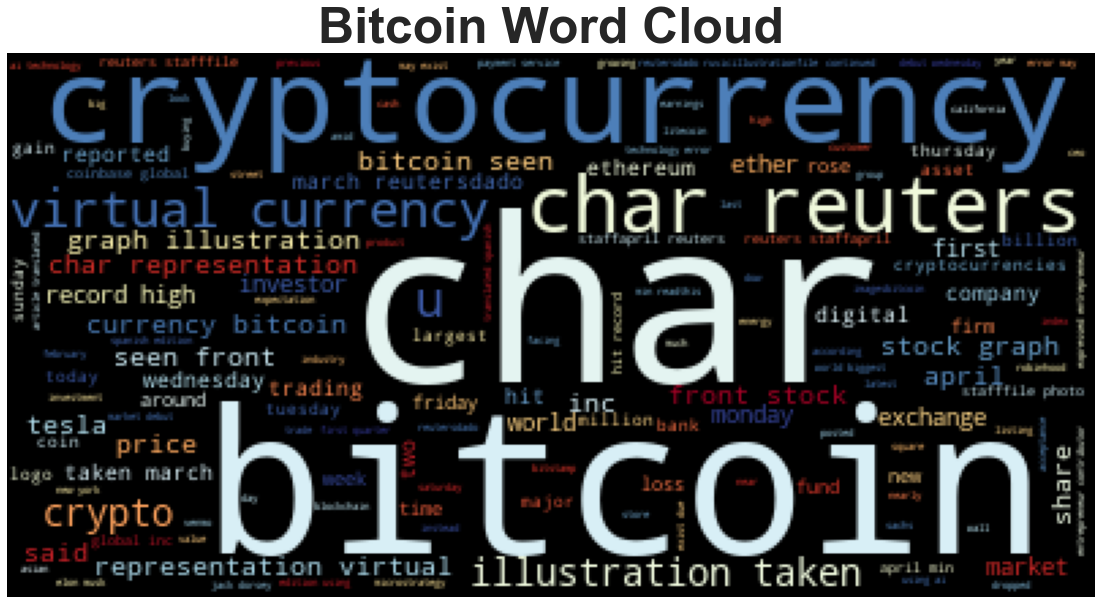

In [73]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

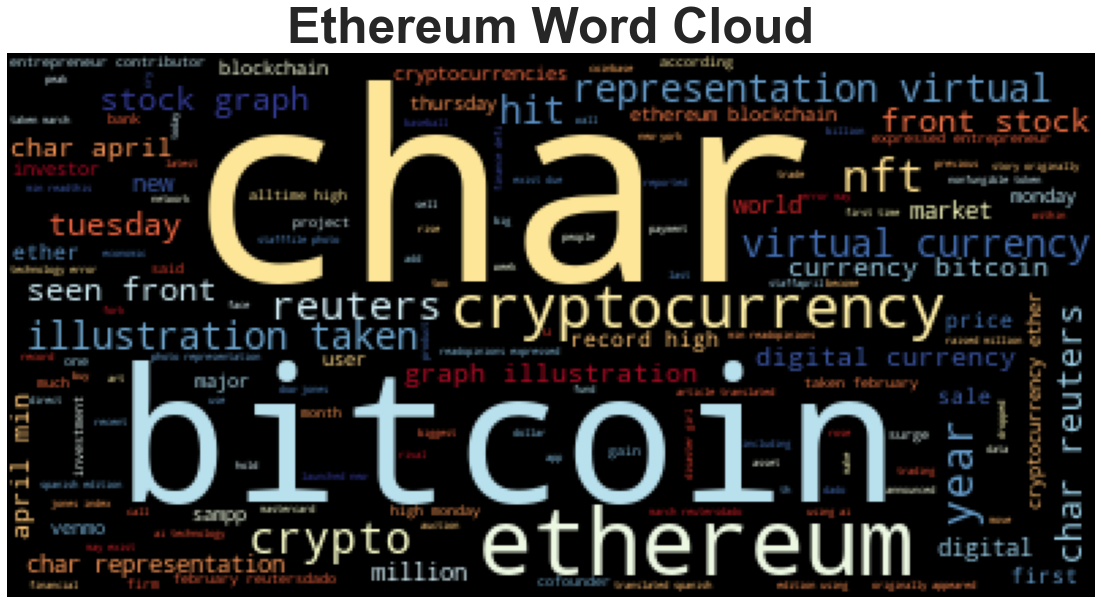

In [74]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(flat_eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [75]:
import spacy
from spacy import displacy

In [76]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [77]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [78]:
# Concatenate all of the Bitcoin text together
flat_btc_text_str = " ".join(bitcoin_df.text.to_list())
print(flat_btc_text_str)

Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars] Tesla’s relationship with bitcoin is not a dalliance, according to the comments made by the company’s CFO and dubbed “master of coin” Zach Kirkhorn during an earnings call Monday. Instead, the compan… [+3073 chars] Cryptocurrency continues to gain mainstream acceptance, as PayPal announced that they have added Bitcoin, Ethereum, Bitcoin Cash, and Litecoin to its Venmo app. With a user base of 70 million, the mo… [+2782 chars] Cryptocurrency prices continued to tumble Friday with Bitcoin leading the charge, with prices for the internet currency dipping below $50,000 for the first time since early March.
Bitcoin is down ro… [+1222 chars] The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bi

In [ ]:
# Run the NER processor on all of the text
btc_doc = nlp(flat_btc_text_str)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin News"

In [ ]:
# Render the visualization
displacy.render(btc_doc,style='ent')

In [ ]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# Concatenate all of the Bitcoin text together
flat_eth_text_str = " ".join(ethereum_df.text.to_list())
print(flat_eth_text_str)

In [ ]:
# Run the NER processor on all of the text
eth_doc = nlp(flat_eth_text_str)

# Add a title to the document
btc_doc.user_data["title"] = "Ethereum News"

In [ ]:
# Render the visualization
displacy.render(eth_doc,style='ent')

In [ ]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

---